# Exploding Flow Experiment

This is the main notebook for investigating the variation in time of the flow matching flows. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.flow import Flowmodel
from train import train_flow
import torch
import torch.nn as nn
from utils.visualize import visualize_flow_evolution
from datasets.synthetic import sample_dataset, draw_compare
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Dataset Specification 

Seletc and sample from a data distribution. Can be among ```swiss_roll```, ```moons```, or ```manual```.

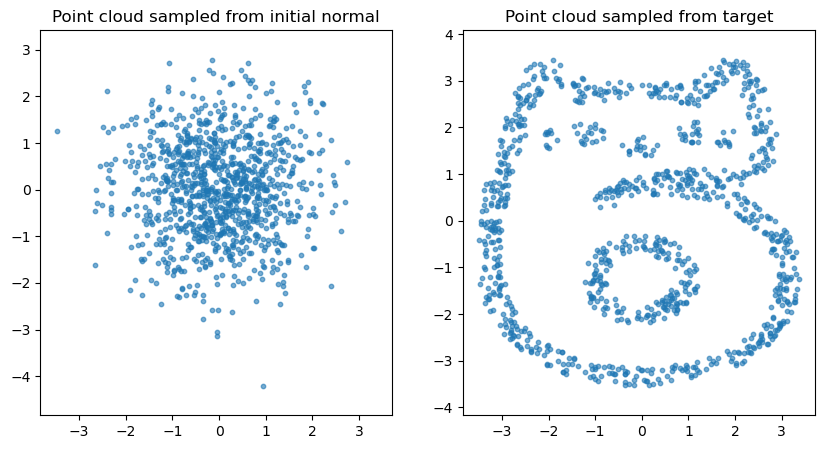

In [3]:
dataset = 'manual' 
filename = 'num6cat.jpg'
n_samples = 1024
noise = 0
scale = 2
x1 = sample_dataset(n_samples, noise, scale, dataset, filename)
draw_compare(x1)

### Train Flow Model

In [5]:
flow_model = train_flow(dataset, filename, n_samples, noise, scale, n_iters=5000)

Step 0, Loss: 4.9788031578063965
Step 1000, Loss: 3.027456283569336
Step 2000, Loss: 3.1184067726135254


KeyboardInterrupt: 

### Sample From Flow

In [6]:
from utils.visualize import visualize_flow_evolution

x0 = torch.randn(n_samples, 2)
visualize_flow_evolution(flow_model, x0, n_steps=10, xlim=(-3,4), ylim=(-3,3))

NameError: name 'flow_model' is not defined

### Visualize the variance in the flow

Plotted below are several statistics for the flow
* Blue curve on left: Mean vector length at time $t$.
* Orange curve on left: Std Vector length at time $t$.
* Blue curve on right: Mean divergence of the field at time $t$.
* Orange curve on right: Mean curl of the field at time $t$.

For dataset manual, with filename num6cat.jpg


100%|██████████| 20/20 [00:00<00:00, 181.89it/s]


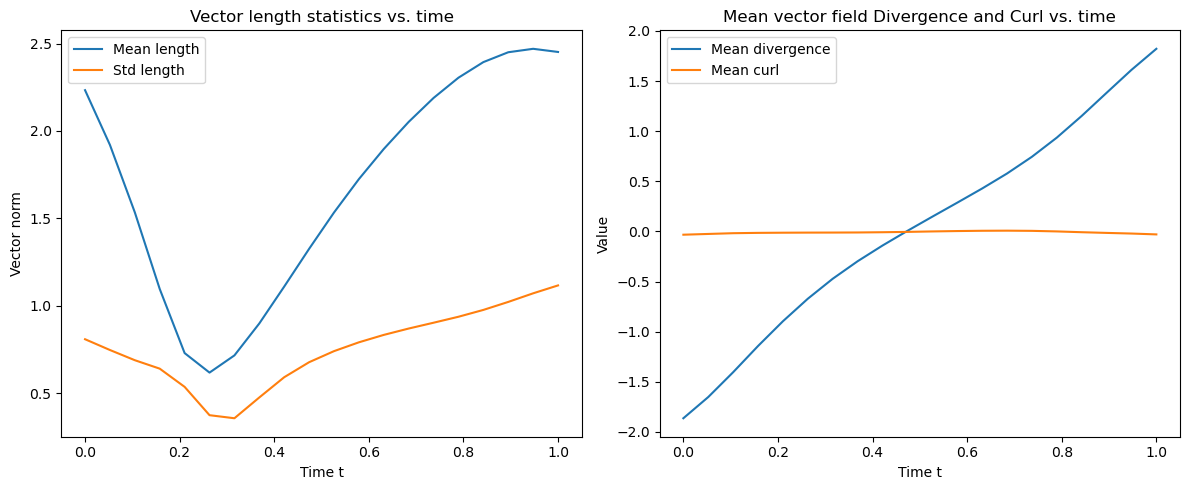

In [ ]:
from utils.flow_analysis import analyze_flow_over_time

print(f"The flow for distribution {dataset}, with filename {filename}, has the following statistics:")
analyze_flow_over_time(flow_model, (-3,3), (-3,3), (64,64) , time_steps=20)